In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df_1 = pd.read_csv('/content/StudentsPerformance_clean_data.csv')

In [17]:
# Display the first few rows of the dataset
df_1.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [18]:
df_1.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


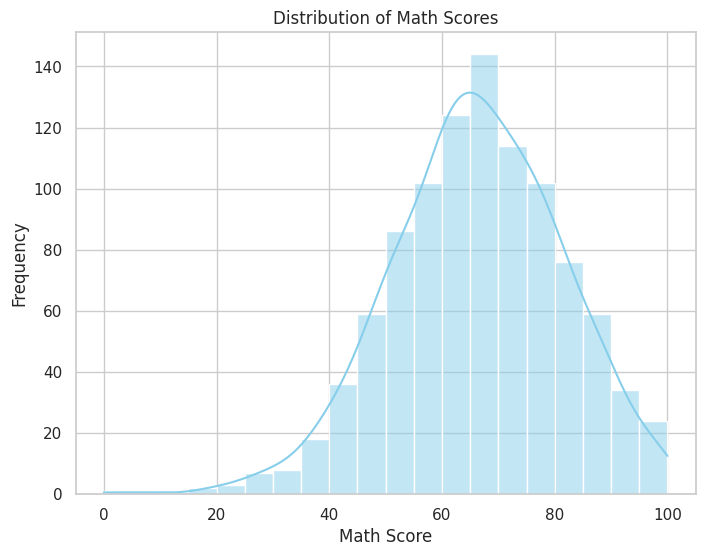

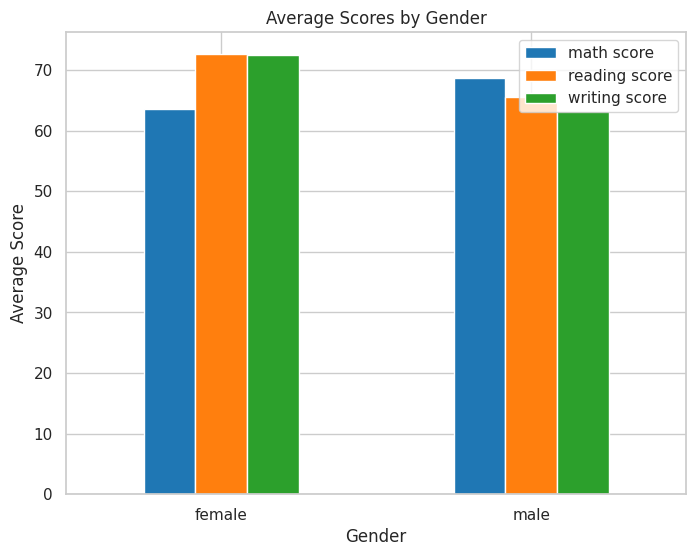

<ipython-input-19-49ced46f3cf6>:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(data, labels=labels, patch_artist=True)


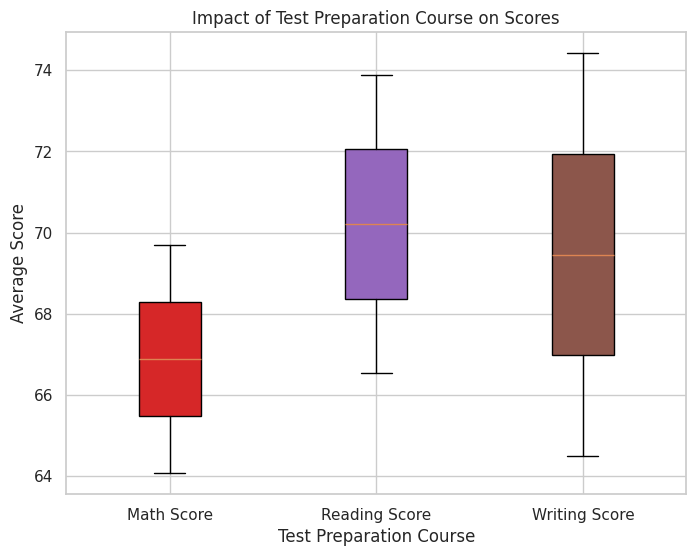

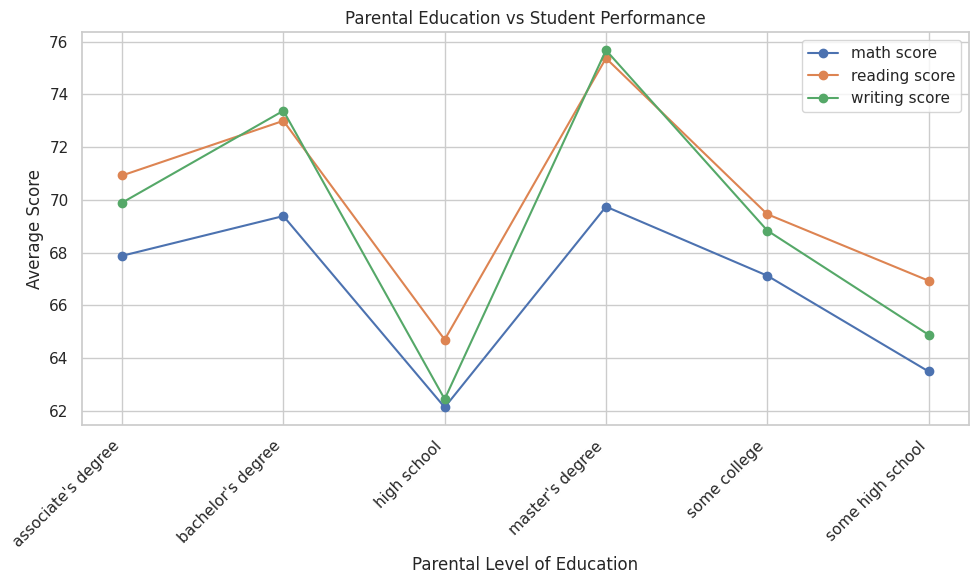

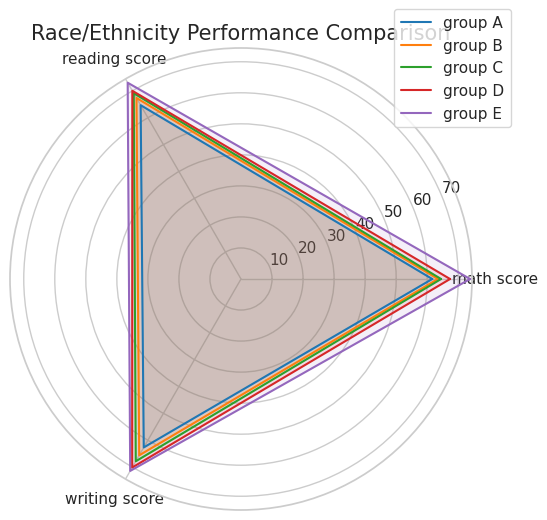

In [19]:
# Visualization 1: Histogram of Math Scores
plt.figure(figsize=(8,6))
sns.histplot(df_1['math score'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

# Visualization 2: Bar Chart - Gender vs Scores
gender_scores = df_1.groupby('gender')[['math score', 'reading score', 'writing score']].mean()
gender_scores.plot(kind='bar', figsize=(8,6), color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.title('Average Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

# Visualization 3: Impact of Test Preparation Course
prep_scores = df_1.groupby('test preparation course')[['math score', 'reading score', 'writing score']].mean()
fig, ax = plt.subplots(figsize=(8, 6))
data = [prep_scores['math score'], prep_scores['reading score'], prep_scores['writing score']]
# The labels should correspond to the columns being plotted, not the index of prep_scores
labels = ['Math Score', 'Reading Score', 'Writing Score']
bp = ax.boxplot(data, labels=labels, patch_artist=True)
colors = ['#d62728', '#9467bd', '#8c564b']
for i, box in enumerate(bp['boxes']):
    box.set_facecolor(colors[i % len(colors)])

plt.title('Impact of Test Preparation Course on Scores')
plt.xlabel('Test Preparation Course')
plt.ylabel('Average Score')
plt.xticks(rotation=0)
plt.show()

# Visualization 4: Parental Education vs Student Performance using Line Plot
parent_edu_scores = df_1.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean().reset_index()
plt.figure(figsize=(10, 6))
for score_type in ['math score', 'reading score', 'writing score']:
    plt.plot(parent_edu_scores['parental level of education'], parent_edu_scores[score_type], marker='o', label=score_type)
plt.title('Parental Education vs Student Performance')
plt.xlabel('Parental Level of Education')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()
# Visualization 5: Radar Chart for Race/Ethnicity Performance
from math import pi
categories = ['math score', 'reading score', 'writing score']
race_scores = df_1.groupby('race/ethnicity')[categories].mean()

# Radar plot setup
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

for i, row in enumerate(race_scores.iterrows()):
    values = row[1].tolist()
    values += values[:1]
    angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
    angles += angles[:1]
    ax.plot(angles, values, label=row[0], color=colors[i])
    ax.fill(angles, values, color=colors[i], alpha=0.1)

plt.xticks(angles[:-1], categories)
plt.title('Race/Ethnicity Performance Comparison', size=15)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()
